# **Machine Learning Assignment (AUEB 2023-2024)**
## **0. Dataset analysis and construction**


---



*Yorgos Velissaridis P3210255*

*Evangelos Kleidopoulos P3190084*

In [2]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from matplotlib import colormaps

## **Dataset Introduction**

The **GTzan Dataset** (["the MNIST for music"](https://music-classification.github.io/tutorial/part2_basics/dataset.html#gtzan-music-genre-2002))
is a famous music dataset, created by G. Tzanetakis and P. Cook (2002 [paper](https://www.cs.cmu.edu/~gtzan/work/pubs/tsap02gtzan.pdf))

It is made up of a thousand 30-second excerpts of music pieces in .wav format, classified into 10 genres with a hundred pieces each. In machine learning parlance these genres are the dataset's labels: classical, country, disco, hiphop, jazz, rock, blues, reggae, pop, metal.

In this assignment we will use an extended version of the dataset in which the 30 second excerpts have been split into 5 second segments, to provide more data to train our models with (see below for details of construction).



## **Exploratory Data Analysis**

### Basic exploration

We start the dataset analysis by diplaying some of its fundamental attributes and statistics.


Let's import and take a look at the overall picture of the dataset:

In [2]:
with open('GTzan_60features_5sec.csv', newline='') as csv:
    GTzan = pd.read_csv(csv, dtype={'genre':'category'})

In [3]:
GTzan

,filename,samples,rms_mean,rms_variance,zero_crossing_rate_mean,zero_crossing_rate_variance,chroma_cq_c_mean,chroma_cq_c#_mean,chroma_cq_d_mean,chroma_cq_d#_mean,...,mfcc_12_mean,mfcc_13_mean,mfcc_14_mean,mfcc_15_mean,mfcc_16_mean,mfcc_17_mean,mfcc_18_mean,mfcc_19_mean,mfcc_20_mean,genre
0,blues.00000.0,110299,0.074720,0.001257,0.083980,0.000822,0.647168,0.544326,0.485993,0.415471,...,1.581242,0.769748,-1.629405,-0.835810,0.022895,0.414073,0.431500,-1.456924,-0.407029,blues
1,blues.00000.1,110299,0.074751,0.001522,0.075733,0.000575,0.575163,0.508438,0.457708,0.351827,...,1.863359,1.273702,0.508394,1.055285,0.831763,0.565101,1.099983,-0.765583,-0.146480,blues
2,blues.00000.2,110299,0.085335,0.000963,0.069763,0.000292,0.556213,0.447189,0.546210,0.382096,...,1.422699,0.396024,-1.455270,0.396221,0.365763,1.092411,1.095159,-0.041551,0.012555,blues
3,blues.00000.3,110299,0.077229,0.001630,0.092911,0.001226,0.539613,0.492980,0.514969,0.356296,...,1.428427,0.635322,-0.383852,0.288091,0.025232,1.281756,1.110556,-0.870691,0.334965,blues
4,blues.00000.4,110299,0.084481,0.001235,0.074018,0.000321,0.620262,0.539485,0.528982,0.353758,...,1.448201,0.617132,0.132729,0.363585,0.242164,0.782870,0.014991,-1.415542,0.031598,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,rock.00099.1,110299,0.039307,0.000300,0.090303,0.005230,0.138525,0.144016,0.149649,0.168553,...,-0.259370,-0.225426,0.240660,1.872855,0.349494,0.151711,0.430371,1.625877,0.612555,rock
5903,rock.00099.2,110299,0.031797,0.000034,0.054905,0.000729,0.219886,0.143363,0.126131,0.235211,...,-1.125199,1.019512,-0.168725,-0.510519,-1.796690,0.576952,-0.611579,0.610482,0.548671,rock
5904,rock.00099.3,110299,0.033437,0.000051,0.080627,0.000942,0.232780,0.247210,0.124239,0.213298,...,-0.609800,2.373250,0.939165,-0.066561,-1.010833,-0.710202,-1.081103,0.002182,0.327090,rock
5905,rock.00099.4,110299,0.035801,0.000251,0.091512,0.003495,0.183052,0.209099,0.183655,0.269703,...,-0.160026,0.779153,0.369382,0.841416,0.269245,0.139170,0.528759,0.650658,0.159427,rock


We see less than the expected 6,000 rows (a thousand 30sec excerpts split into 5sec segments), due to removal of segments that were corrupted and some slightly briefer excerpts that were split into 5 rather than 6 segments. All excerpts of the original GTzan dataset and segments resulting from the spliting have sample rate equal to 22050 Hz.

The dataset contains no null values, and is made up of the following columns, with features between columns 2 and 61 being numerical:

In [4]:
GTzan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907 entries, 0 to 5906
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   filename                     5907 non-null   object  
 1   samples                      5907 non-null   int64   
 2   rms_mean                     5907 non-null   float64 
 3   rms_variance                 5907 non-null   float64 
 4   zero_crossing_rate_mean      5907 non-null   float64 
 5   zero_crossing_rate_variance  5907 non-null   float64 
 6   chroma_cq_c_mean             5907 non-null   float64 
 7   chroma_cq_c#_mean            5907 non-null   float64 
 8   chroma_cq_d_mean             5907 non-null   float64 
 9   chroma_cq_d#_mean            5907 non-null   float64 
 10  chroma_cq_e_mean             5907 non-null   float64 
 11  chroma_cq_f_mean             5907 non-null   float64 
 12  chroma_cq_f#_mean            5907 non-null   float64 
 13  chr

The distribution of genres in the dataset is roughly equal, to the degree that it does not interfere with our prediction tasks:

In [5]:
genre_counts = GTzan['genre'].value_counts()
genre_counts

genre
blues        600
pop          594
reggae       594
classical    593
disco        593
rock         593
country      591
hiphop       585
jazz         582
metal        582
Name: count, dtype: int64

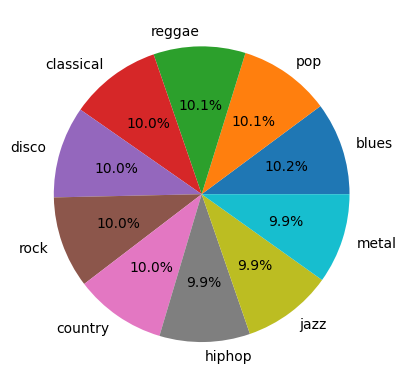

In [6]:
sizes = genre_counts.to_numpy()
labels = genre_counts.index.to_numpy()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

Aside from the filenames (first column), length in samples (second column) and genres (last column) there are 60 numerical features describing each of our excerpts.

What do all of these features represent and how were they extracted from the audio files?

## **Understanding the features**

All the features were created using the [`librosa`](https://librosa.org/doc/latest/index.html) package for music and audio analysis, commonly used in the field of Music Information Retrieval (MIR).

Let's start by picking an excerpt, e.g. the classical excerpt no.14. Here's how it sounds:

**(WARNING: lower sound volume)**

In [8]:
piece, sr = librosa.load("GTzan_dataset/classical/classical.00014.wav")
ipd.Audio(piece, rate=sr)

This is what it's waveform looks like:

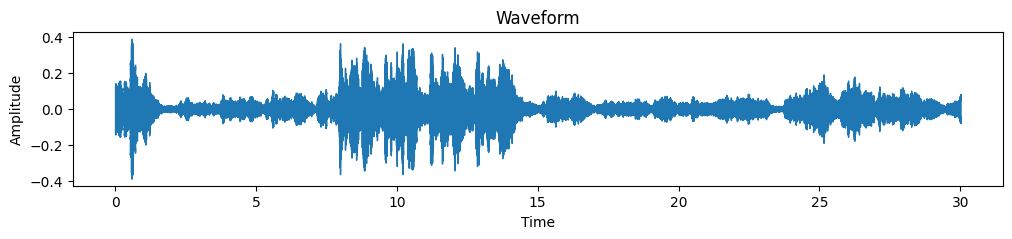

In [9]:
plt.figure(figsize=(12, 2))
librosa.display.waveshow(piece, sr=sr)
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

This is the spectrogram of the excerpt, computed using the [short-term Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform) ([`stft`](https://librosa.org/doc/main/generated/librosa.stft.html)\):

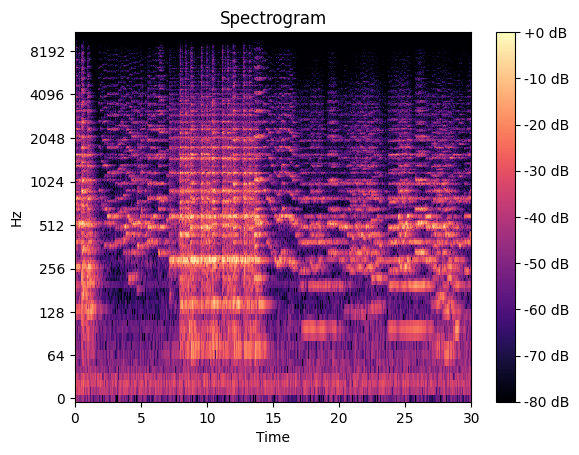

In [10]:
S = np.abs(librosa.stft(piece))

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

Now that we visualized the excerpt we can move on to features:

(note that, in the dataset, features are extracted from 5 second segments split off of the excerpts, but here we display the features extracted from the 30 second excerpt we chose for demonstration purposes)

### 1. RMS

The [energy](https://en.wikipedia.org/wiki/Energy_(signal_processing)) of a signal corresponds to the total magntiude of the signal. For audio signals, that roughly corresponds to how loud the signal is. The energy in a signal is defined as:

$$ \sum_n \left| x(n) \right|^2 $$

[Root mean square energy](https://en.wikipedia.org/wiki/Root_mean_square) (RMSE) is a normalized rough measure of loudness and defined as:

$$ \sqrt{ \frac{1}{N} \sum_n \left| x(n) \right|^2 } $$

The rms feature ([`rms`](https://librosa.org/doc/0.10.1/generated/librosa.feature.rms.html#librosa.feature.rms)) is computing the RMSE for each small frame making up the signal (here frame length = 2024 samples)

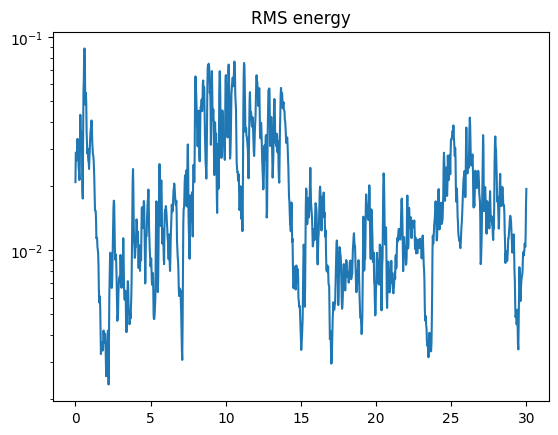

In [11]:
rms = librosa.feature.rms(S=S)

fig, ax = plt.subplots()
times = librosa.times_like(rms)
ax.semilogy(times, rms[0])
ax.set(title='RMS energy')
plt.show()

### 2. Zero crossing rate

The [`zero_crossing_rate`](https://librosa.org/doc/0.10.1/generated/librosa.feature.zero_crossing_rate.html) feature computes the rate at which each frame of a signal changes from positive to zero to negative or from negative to zero to positive, and is used to identify the signal's percussiveness.

In [12]:
zero_cross = librosa.feature.zero_crossing_rate(piece).reshape(-1)
print("The resulting array has", zero_cross.shape[0], "elements, as many as the frames of the signal, and it contains the zero crossing rate for each of those frames:")
print(zero_cross)

The resulting array has 1293 elements, as many as the frames of the signal, and it contains the zero crossing rate for each of those frames:
[0.05761719 0.09667969 0.12988281 ... 0.05859375 0.04833984 0.03271484]


### 3. Constant-Q Chroma

The constant-Q chroma feature ([`chroma_cqt`](https://librosa.org/doc/0.10.1/generated/librosa.feature.chroma_cqt.html)) is a representation suited for music audio in which the [constant-Q transform](https://en.wikipedia.org/wiki/Constant-Q_transform) of the audio signal is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave in [12 tone equal temperament](https://en.wikipedia.org/wiki/12_equal_temperament). Since, in music, notes exactly one octave apart are perceived as particularly similar, knowing the distribution of chroma even without the absolute frequency (i.e. the original octave) can give useful musical information about the audio -- and may even reveal perceived musical similarity that is not apparent in the original spectra. ([source](https://www.ee.columbia.edu/~dpwe/resources/matlab/chroma-ansyn/))

The dataset contains seperate chroma features for each of the 12 notes.

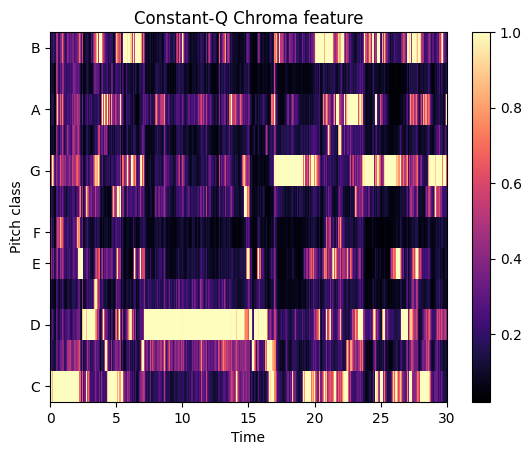

In [13]:
chroma_cq = librosa.feature.chroma_cqt(y=piece, sr=sr)

fig, ax = plt.subplots()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
ax.set(title='Constant-Q Chroma feature')
fig.colorbar(img, ax=ax)
plt.show()

### 4. Tonnetz

The Harmonic Network or [Tonnetz](https://en.wikipedia.org/wiki/Tonnetz) is a well known planar representation of pitch relations first attributed to Euler, later used extensively by 19th century music theorists such as Riemann and Oettingen and in recent years by Neo-Riemanninan Music Theorists. Close harmonic relations are modelled by small distances on the plane. Lines of fifths travel from left to right, lines of major thirds travel from bottom left to top right and lines of minor thirds travel from top left to bottom right. ([source](https://ofai.at/papers/oefai-tr-2006-13.pdf)\)

The [`tonnetz`](https://librosa.org/doc/0.10.1/generated/librosa.feature.tonnetz.html#librosa.feature.tonnetz) feature projects chroma features onto a 6-dimensional basis representing the perfect fifth, minor third, and major third each as two-dimensional coordinates:


*   0: Fifth x-axis
*   1: Fifth y-axis
*   2: Minor x-axis
*   3: Minor y-axis
*   4: Major x-axis
*   5: Major y-axis



![image.png](https://www.researchgate.net/profile/Kyogu-Lee-2/publication/221367627/figure/fig3/AS:667707867398148@1536205369980/Visualizing-the-6-D-Tonal-Space-as-three-circles-fifths-minor-thirds-and-major-thirds.ppm)

Visualising the the 6-D Tonal Space as three circles. Circles left to right: Fifths, Minor Thirds and
Major Thirds. The Tonal Centroid for chord A Major (pitch classes 9,1 and 4) is shown at point A
 ([source](https://ofai.at/papers/oefai-tr-2006-13.pdf))

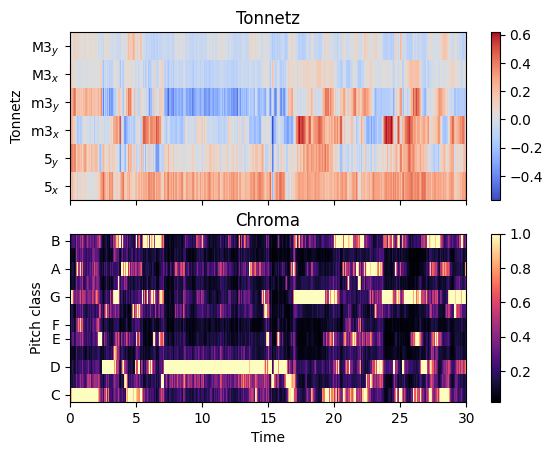

In [14]:
tonnetz = librosa.feature.tonnetz(chroma=chroma_cq, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tonnetz,
                                y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonnetz')
ax[0].label_outer()
img2 = librosa.display.specshow(chroma_cq,
                                y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])
plt.show()

### 5. Spectral centroid

The [spectral centroid](https://en.wikipedia.org/wiki/Spectral_centroid) is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of the spectrum is located using a weighted mean:

$$ f_c = \frac{\sum_k S(k) f(k)}{\sum_k S(k)} $$

where $S(k)$ is the spectral magnitude at frequency bin $k$, $f(k)$ is the frequency at bin $k$.

Perceptually, it has a robust connection with the impression of brightness of a sound.

The [`spectral_centroid`](https://librosa.org/doc/0.10.1/generated/librosa.feature.spectral_centroid.html#librosa.feature.spectral_centroid) feature computes the centroid for each frame of the signal using its fourier transform.

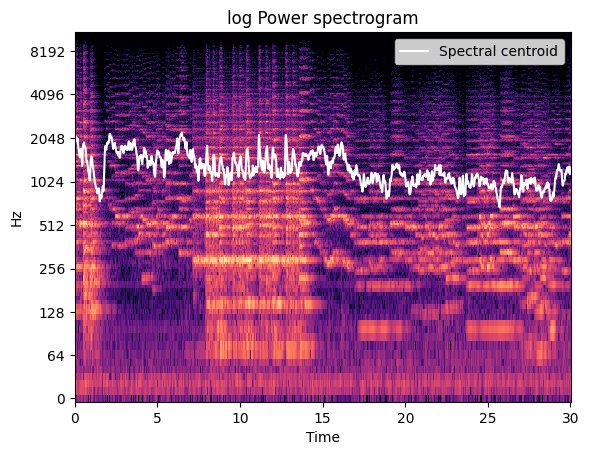

In [15]:
cent = librosa.feature.spectral_centroid(S=S)

times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')
plt.show()

### 6. Spectral bandwidth

The [`spectral_bandwidth`](https://librosa.org/doc/0.10.1/generated/librosa.feature.spectral_bandwidth.html#librosa.feature.spectral_bandwidth) feature computes the order-$p$ spectral bandwidth:

$$ \left( \sum_k S(k) \left(f(k) - f_c \right)^p \right)^{\frac{1}{p}} $$

where $S(k)$ is the spectral magnitude at frequency bin $k$, $f(k)$ is the frequency at bin $k$, and $f_c$ is the spectral centroid. We will use $p = 2$, which is like a weighted standard deviation.

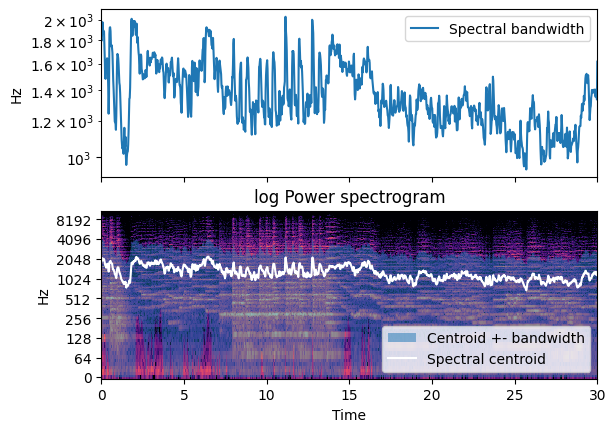

In [16]:
spec_bw = librosa.feature.spectral_bandwidth(S=S, centroid=cent)

ig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')
plt.show()

### 7. Spectral rolloff

Spectral rolloff is the frequency below which a specified percentage of the total spectral energy lies. We will use the default setting of 85% percent.

The [`spectral_rolloff`](https://librosa.org/doc/0.10.1/generated/librosa.feature.spectral_rolloff.html#librosa.feature.spectral_rolloff) feature computes the spectral rolloff frequency for each frame of the signal.

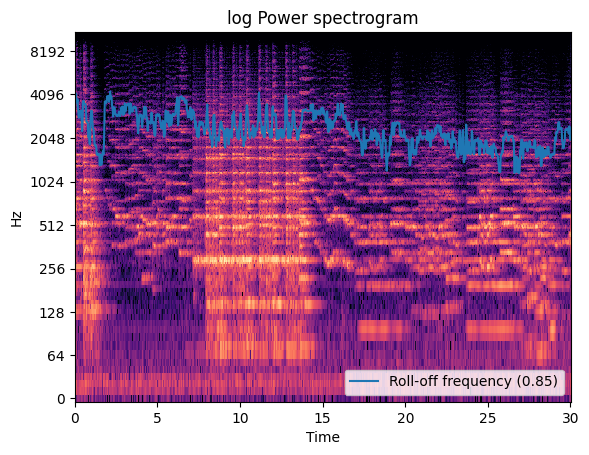

In [17]:
rolloff= librosa.feature.spectral_rolloff(S=S, sr=sr)

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.85)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')
plt.show()

### 8. MFCCs

The [mel frequency cepstral coefficients](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) (MFCCs) of a signal are a small set of features which concisely describe the overall shape of a spectral envelope. In Music Information Retrieval (MIR), it is often used to describe timbre.

We will we use the [`mfcc`](https://librosa.org/doc/latest/generated/librosa.feature.mfcc.html#librosa.feature.mfcc) feature to compute 20 mfccs over our signal.

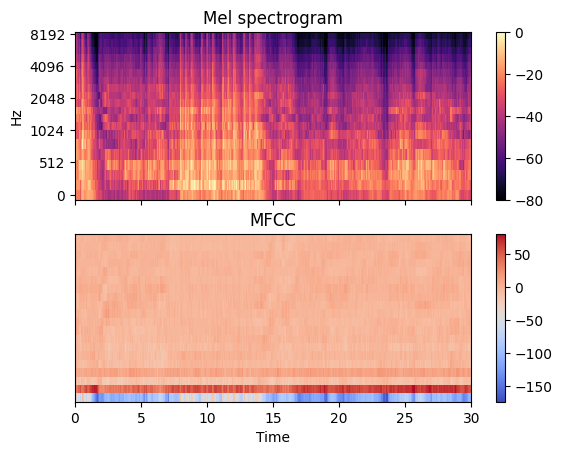

In [18]:
melspectrogram = librosa.feature.melspectrogram(y=piece, sr=sr, n_mels=20,
                                   fmax=8000)
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(melspectrogram), sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(melspectrogram, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')
plt.show()

## Exploratory Data Analysis continued

### Feature statistics

We now visualize some of the features over the entire dataset, to get a sense of the differences between the various genres.

Here is a boxplot describing the distribution of the mean of the zero crossing rate for each genre.

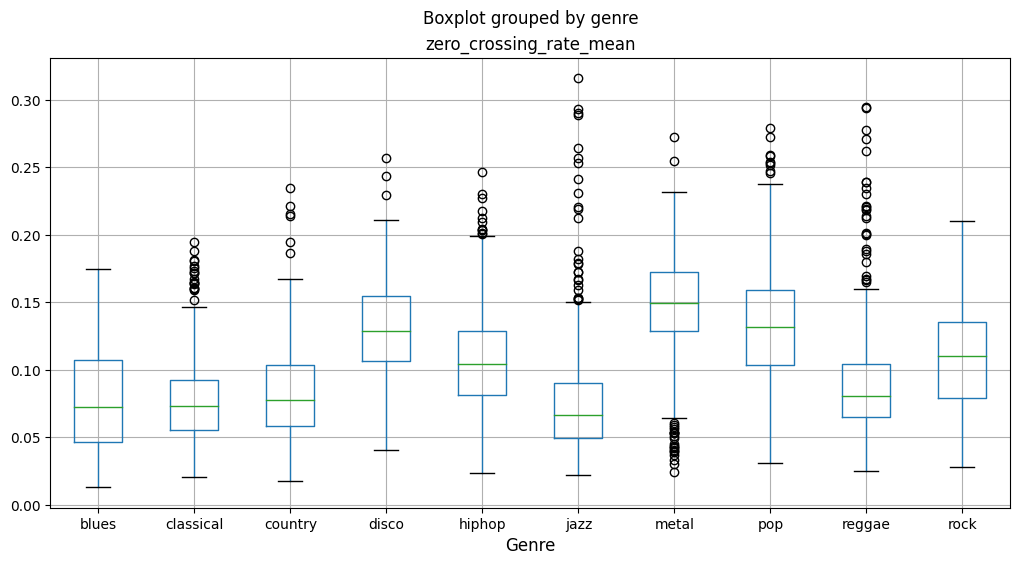

In [19]:
GTzan.boxplot('zero_crossing_rate_mean', by='genre', figsize=(12,6), fontsize=10)
plt.xlabel("Genre", fontsize=12)
plt.show()

Since the zero crossing rate corresponds with a signals percussiveness, it makes sense that metal, pop and disco have higher values than classical, country and jazz.

We notice that for many genres there are multiple outliers, however they are very few compared to the number of samples in each genre and potentially provide important information therefore we will not remove them.

We now randomly select a thousand samples and visualize them in a scatterplot, where the x-axis corresponds to the RMS mean and the y-axis to the RMS variance.

In [20]:
GTzan_shuffled = GTzan.sample(1000)

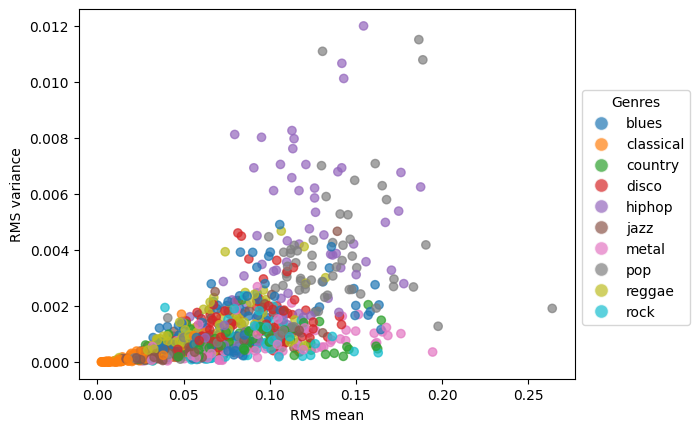

In [21]:
fig, ax = plt.subplots()

rms_mean = GTzan_shuffled['rms_mean'].to_numpy()
rms_variance = GTzan_shuffled['rms_variance'].to_numpy()
genres = np.unique(GTzan_shuffled['genre'])

colormap = colormaps['tab10']

ax.scatter(rms_mean, rms_variance, c=GTzan_shuffled['genre'].cat.codes, cmap=colormap, alpha=0.7)

plt.xlabel("RMS mean")
plt.ylabel("RMS variance")

colours = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label, alpha=0.7)
                   for color, label in zip(colormap(range(10)), genres)]

ax.legend(colours, genres, title="Genres", bbox_to_anchor=(1,.8))
plt.show()

RMS represents the loudness of a signal, therefore we can conclude that pop is generally quite loud (high mean) but also changes in loudness within 5 second intervals (high variance), whereas classical is generally soft (low mean) and doesn't change in loudness within 5 second intervals (low variance).

Finally, we crate another scatterplot where the axes are the mean position of each sample on the tonnetz corresponding to the fifth.

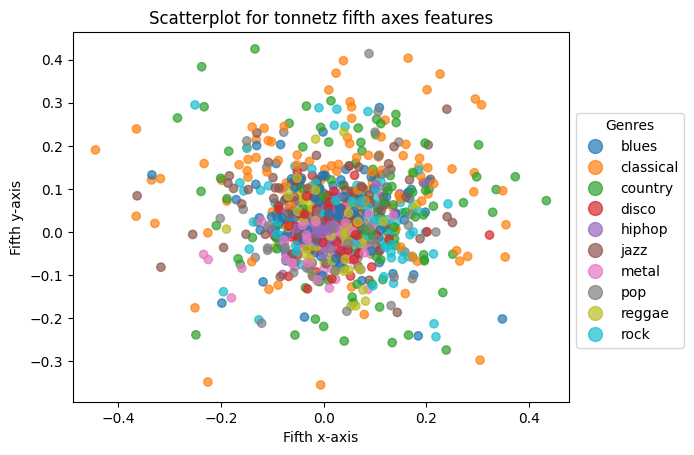

In [22]:
fig, ax = plt.subplots()

tonnetz0 = GTzan_shuffled['tonnetz_0_mean'].to_numpy()
tonnetz1 = GTzan_shuffled['tonnetz_1_mean'].to_numpy()

colormap = colormaps['tab10']

ax.scatter(tonnetz0, tonnetz1, c=GTzan_shuffled['genre'].cat.codes, cmap=colormap, alpha=0.7)

plt.xlabel("Fifth x-axis")
plt.ylabel("Fifth y-axis")


colours = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=color, markeredgecolor=color, markersize=10, label=label, alpha=0.7)
                   for color, label in zip(colormap(range(10)), genres)]
plt.title("Scatterplot for tonnetz fifth axes features")
ax.legend(colours, genres, title="Genres", bbox_to_anchor=(1,.8))
plt.show()

The tonnetz of the fifth has the following property: the simpler a chord, the closer it will be to the circumference of the circle of fifths and vice versa. When we compute the mean of a signal, both the simplicity of the chords and the number of different chords influence its position on the circle.

We notice that genres like classical and country, which occasionally use simple chords and slow harmonic rhythms (rate of change of chords) the corresponding samples are closer to the circumference of the circle of fifths than disco and metal which use more complex chords and are almost always harmonically fast paced.

### Feature correlation

Below we visualize the correlation between the dataset's features:

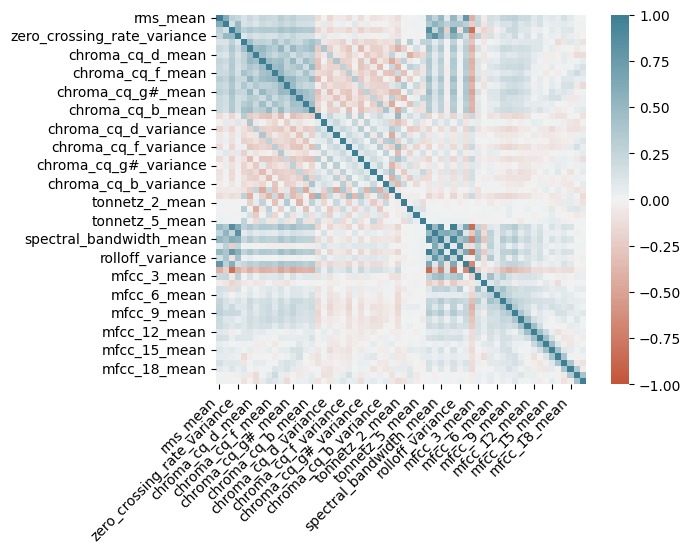

In [23]:
import seaborn as sns

GTzan_features_only = GTzan.drop(['samples', 'filename', 'genre'], axis=1)

GTzan_corr = GTzan_features_only.corr()

ax = sns.heatmap(
    GTzan_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We can see that the correlation is generally low but in a few cases it reaches high positive or negative correlation. Specifically, that happens between sub-features of the same family (e.g. chomas, MFCCs) or between features that measure similar signal characteristics (spectral centroid, bandwidth and rolloff). Nonetheless, the overall picture is good enough for our prediction tasks so we can proceed.

## **Dataset construction**

We will now create the dataset from the audio files using the features described above.

### Outlier removal

Before extracting the features of each excerpt we will remove known outliers, which have been identified in an [extensive study](https://arxiv.org/pdf/1306.1461.pdf) of GTzan. Specifically we will remove 14 distorted audio files.

In [24]:
sound_files = librosa.util.find_files("GTzan_dataset/")

sound_files = [sound_file for sound_file in sound_files if not ('classical.00049' in sound_file or
                                                                'country.00002' in sound_file or
                                                                'disco.00063' in sound_file or
                                                                'hiphop.00003' in sound_file or
                                                                'hiphop.00005' in sound_file or
                                                                'jazz.00052' in sound_file or
                                                                'jazz.00054' in sound_file or
                                                                'jazz.00066' in sound_file or
                                                                'metal.00033' in sound_file or
                                                                'metal.00073' in sound_file or
                                                                'metal.00084' in sound_file or
                                                                'pop.00037' in sound_file or
                                                                'reggae.00086' in sound_file or
                                                                'rock.00027' in sound_file)]

### Constuction loop

For each excerpt that is loaded from the dataset, it is:

1.   trimmed, so that it doesn't include silence at its beginning or end,
2.   split into roughly 3 second segments, depending on its length.

Then, for each of the segments created:


1.   all the features described are computed,
2.   the means (and for some, also the variances) of these features over the length of the segment are extracted,
3.   they are compiled into an entry (row vector) that is added to the dataset.



In [25]:
from tqdm import tqdm
from pathlib import Path

df = pd.DataFrame(columns=["filename", "samples",
                           "rms_mean", "rms_variance",
                           "zero_crossing_rate_mean", "zero_crossing_rate_variance",
                           "chroma_cq_c_mean", "chroma_cq_c#_mean", "chroma_cq_d_mean", "chroma_cq_d#_mean",
                           "chroma_cq_e_mean", "chroma_cq_f_mean", "chroma_cq_f#_mean", "chroma_cq_g_mean",
                           "chroma_cq_g#_mean", "chroma_cq_a_mean", "chroma_cq_a#_mean", "chroma_cq_b_mean",
                           "chroma_cq_c_variance", "chroma_cq_c#_variance", "chroma_cq_d_variance", "chroma_cq_d#_variance",
                           "chroma_cq_e_variance", "chroma_cq_f_variance", "chroma_cq_f#_variance", "chroma_cq_g_variance",
                           "chroma_cq_g#_variance", "chroma_cq_a_variance", "chroma_cq_a#_variance", "chroma_cq_b_variance",
                           "tonnetz_0_mean", "tonnetz_1_mean", "tonnetz_2_mean", "tonnetz_3_mean",
                           "tonnetz_4_mean", "tonnetz_5_mean",
                           "spectral_centroid_mean", "spectral_centroid_variance",
                           "spectral_bandwidth_mean", "spectral_bandwidth_variance",
                           "rolloff_mean", "rolloff_variance",
                           "mfcc_1_mean", "mfcc_2_mean", "mfcc_3_mean", "mfcc_4_mean", "mfcc_5_mean", "mfcc_6_mean",
                           "mfcc_7_mean", "mfcc_8_mean", "mfcc_9_mean", "mfcc_10_mean", "mfcc_11_mean", "mfcc_12_mean",
                           "mfcc_13_mean", "mfcc_14_mean", "mfcc_15_mean", "mfcc_16_mean", "mfcc_17_mean", "mfcc_18_mean",
                           "mfcc_19_mean", "mfcc_20_mean",
                           "genre"])

for sound_file in tqdm(sound_files):
  try:
    piece, sr = librosa.load(sound_file)
  except:
    print("\nThe soundfile at location:", sound_file, "cannot be opened. It is skipped.\n")
    continue

  piece, _ = librosa.effects.trim(piece)

  # Compute how many 5 second segments this excerpt can be split into
  num_splits = int(piece.shape[0]/(sr*5))

  # Number of samples of each excerpt
  samples = piece.shape[0]//num_splits

  for i in range(num_splits):
    segment = piece[samples*i: samples*(i+1)]

    file_name = Path(sound_file).stem
    entry = np.array(file_name+"."+str(i))

    entry = np.append(entry, segment.shape[0])

    S = np.abs(librosa.stft(segment))

    rms = librosa.feature.rms(S=S)
    entry = np.append(entry, np.mean(rms))
    entry = np.append(entry, np.var(rms))

    zero_cross = librosa.feature.zero_crossing_rate(segment)
    entry = np.append(entry, np.mean(zero_cross))
    entry = np.append(entry, np.var(zero_cross))

    chroma_cq = librosa.feature.chroma_cqt(y=segment, sr=sr)
    entry = np.append(entry, np.mean(chroma_cq, 1))
    entry = np.append(entry, np.var(chroma_cq, 1))

    tonnetz = librosa.feature.tonnetz(chroma=chroma_cq, sr=sr)
    entry = np.append(entry, np.mean(tonnetz, 1))

    cent = librosa.feature.spectral_centroid(S=S)
    entry = np.append(entry, np.mean(cent))
    entry = np.append(entry, np.var(cent))

    spec_bw = librosa.feature.spectral_bandwidth(S=S, centroid=cent)
    entry = np.append(entry, np.mean(spec_bw))
    entry = np.append(entry, np.var(spec_bw))

    rolloff = librosa.feature.spectral_rolloff(S=S, sr=sr)
    entry = np.append(entry, np.mean(rolloff))
    entry = np.append(entry, np.var(rolloff))

    melspectrogram = librosa.feature.melspectrogram(y=segment, sr=sr, n_mels=20,
                                    fmax=8000)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(melspectrogram), sr=sr)

    entry = np.append(entry, np.mean(mfccs, 1))

    genre = file_name.split(".")[0]
    entry = np.append(entry, genre)

    df.loc[len(df)] = entry

100%|██████████| 986/986 [07:02<00:00,  2.33it/s]


Let's have a look at the created dataset:

In [26]:
df

,filename,samples,rms_mean,rms_variance,zero_crossing_rate_mean,zero_crossing_rate_variance,chroma_cq_c_mean,chroma_cq_c#_mean,chroma_cq_d_mean,chroma_cq_d#_mean,...,mfcc_12_mean,mfcc_13_mean,mfcc_14_mean,mfcc_15_mean,mfcc_16_mean,mfcc_17_mean,mfcc_18_mean,mfcc_19_mean,mfcc_20_mean,genre
0,blues.00000.0,110299,0.07471953258108666,0.0012567029468942507,0.08397985387731481,0.0008223763014226947,0.6471682,0.54432553,0.48599288,0.41547072,...,1.5812415,0.7697477,-1.629405,-0.8358096,0.022895114,0.4140734,0.4315,-1.4569242,-0.40702876,blues
1,blues.00000.1,110299,0.07475083337502718,0.0015219766418532702,0.07573332609953703,0.0005752794822711186,0.57516325,0.508438,0.4577083,0.351827,...,1.8633596,1.2737017,0.5083942,1.0552847,0.8317634,0.5651008,1.099983,-0.76558304,-0.14647983,blues
2,blues.00000.2,110299,0.08533537493461686,0.0009630986902316793,0.06976318359375,0.0002922190836182347,0.55621284,0.4471894,0.5462103,0.38209566,...,1.4226984,0.3960243,-1.4552699,0.3962213,0.36576295,1.0924112,1.0951589,-0.04155108,0.012555317,blues
3,blues.00000.3,110299,0.07722885277020952,0.0016302135460939905,0.09291133174189815,0.0012263277870065066,0.53961253,0.49298,0.5149686,0.35629562,...,1.4284265,0.63532174,-0.38385156,0.28809124,0.02523197,1.2817564,1.1105565,-0.87069076,0.33496463,blues
4,blues.00000.4,110299,0.0844808895175672,0.0012354605548313387,0.07401756004050926,0.00032132458764502704,0.6202621,0.5394851,0.5289821,0.35375813,...,1.448201,0.61713153,0.1327288,0.36358508,0.24216364,0.7828698,0.014990789,-1.415542,0.031597633,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,rock.00099.1,110299,0.039307159100480986,0.00030031582238681083,0.0903026439525463,0.005229510883040554,0.13852517,0.14401554,0.14964913,0.16855353,...,-0.2593704,-0.22542545,0.24066049,1.8728553,0.3494941,0.15171136,0.4303713,1.6258768,0.6125552,rock
5903,rock.00099.2,110299,0.03179653803099541,3.426717081643493e-05,0.05490451388888889,0.0007292665081259646,0.21988584,0.14336306,0.12613091,0.23521064,...,-1.1251994,1.0195124,-0.16872488,-0.5105189,-1.7966896,0.5769516,-0.6115792,0.6104816,0.5486712,rock
5904,rock.00099.3,110299,0.03343655638183304,5.0832361484955525e-05,0.08062744140625,0.000942128262034169,0.23277959,0.24721023,0.124239035,0.21329813,...,-0.6098001,2.3732498,0.9391655,-0.066561185,-1.0108329,-0.7102015,-1.0811026,0.0021823335,0.32709038,rock
5905,rock.00099.4,110299,0.0358007302780698,0.0002506692603135813,0.09151204427083333,0.0034950690137015455,0.18305215,0.20909865,0.18365458,0.26970327,...,-0.1600263,0.77915335,0.36938152,0.8414164,0.26924518,0.13917,0.5287586,0.6506581,0.15942706,rock


Having analysed the dataset, and understood its features and how they were retrieved from the audio files we proceed to the implementation of the machine learning algorithms.